In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('boston_housing.csv')

# This dataset is no longer available in sklearn, so downloaded from Kaggle and uploaded to Jupyter

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [38]:
df.rename(columns= {'MEDV' : 'Price'}).head()

# changing the MEDV column as Price to make it easier to understand. This is the independent variable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [43]:
df.isnull()

# check to see if there are anu null values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

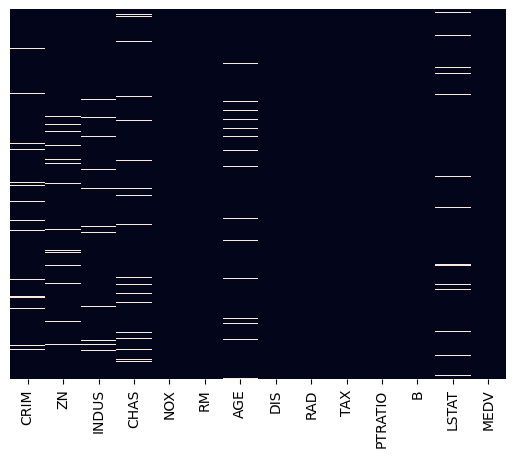

In [46]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)

In [48]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].mean(), inplace = True)
# handle the missing values by replacing the NaN with the means

In [51]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [53]:
# dividing the data into dependent and independent features

X=df.iloc[:,:-1] # independent features
y=df.iloc[:,-1] # dependent features

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # for cross validation, i.e. number of experiments/iterations

In [57]:
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv = 5)
mean_mse = np.mean(mse)
print(mean_mse) # this value should be neat to zero if its a good model

-37.824573316965825


## Ridge Regression

    -In Ridge a hyper paramter called alpha needs to be found out and that is done through Cross Validation.
    -We use GridSearchCV for finding that value

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [70]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-5,1e-2,10,12,15,20,45,50,76,98,100]}
ridge_reg = GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error',cv = 5)
ridge_reg.fit(X,y)
print(ridge_reg.best_params_) # tells you which params was the better
print(ridge_reg.best_score_)

{'alpha': 100}
-30.759516189400678


## Lasso Regression

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-5,1e-2,10,12,15,20,45,50,76,98,100]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv = 100)

lasso_reg.fit(X,y)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.402e+03, tolerance: 4.222e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.428e+03, tolerance: 4.258e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.538e+03, tolerance: 4.266e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.286e+03, tolerance: 4.138e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.191e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.608e+03, tolerance: 4.224e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

{'alpha': 1e-15}
-26.70244962272069


/Users/sourabh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.526e+03, tolerance: 4.272e+00
  model = cd_fast.enet_coordinate_descent(


In [76]:
# now we need to test which model is better by plotting and then we can decide which is more generalised model

from sklearn.model_selection import train_test_split
train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [81]:
prediction_ridge = ridge_reg.predict(X_test)
prediction_lasso = lasso_reg.predict(X_test)

/var/folders/7b/cx_vld9d5cx1xc_f5xv0qg3r0000gp/T/ipykernel_61422/1028230056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='MEDV', ylabel='Density'>

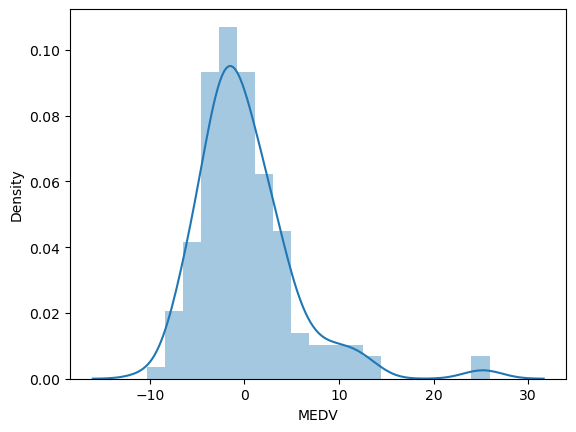

In [85]:
sns.distplot(y_test-prediction_lasso)

/var/folders/7b/cx_vld9d5cx1xc_f5xv0qg3r0000gp/T/ipykernel_61422/1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='MEDV', ylabel='Density'>

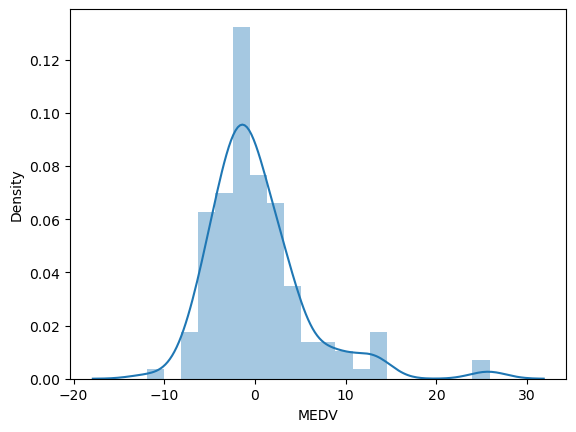

In [86]:
sns.distplot(y_test-prediction_ridge)